# RESUME LIVRABLE 1 - ICO
### Nicolas ACEVEDO - Marie LENGLET - Pablo SKEWES - Yuzhe YAO

## Importation des librairies et modules propres.

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import sys
sys.path.append("../") 
from vrptw import Vehicle, Customer, VRPTW
from loading_models import load_solomon, create_vrptw
from loading_models import CUSTOMER_DIR, DEPOTS_DIR, VEHICLES_DIR, DEPOTS_DISTANCES_DIR, CUSTOMER_DISTANCES_DIR
from solution import solution_checker, list_routes_to_sol, random_solution, generate_cost_function

ImportError: cannot import name 'Vehicle' from 'vrptw' (..\vrptw.py)

## Instanciation du problème 

On crée une instance simple de VRPTW

In [4]:
vrptw = load_solomon('simple.csv', nb_cust=10, vehicle_speed=100)

TypeError: __init__() got an unexpected keyword argument 'id'

On set la fonction de cost au contexte du VRPTW choisit

In [3]:
cost = generate_cost_function(vrptw=vrptw, omega=1000, verbose=0)

On crée 10 solutions random de taille 10 customers

In [4]:
solutions = [random_solution(10, force_check_vrptw=vrptw, verbose=1) for _ in range(10)]

Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.
Solution generated is not legitimate, a new one will be created.


On verify q toutes les solutions crées sont en effet des solutions :

In [12]:
all((solution_checker(vrptw, sol) for sol in solutions))

True

## Application d'algorithmes heuristiques

### Liste tabou

Importation du code

In [13]:
from tabou import tabu_method

Application de la méthode de la liste tabou dans nos 10 solutions.

In [14]:
tabu_solutions = []
for i, solution in enumerate(solutions):
    print(f'Working on solution {i+1}/10')
    tabu_sol = tabu_method(vrptw, solution)
    tabu_solutions.append(tabu_sol)

Working on solution 1/10
Working on solution 2/10
Working on solution 3/10
Working on solution 4/10
Working on solution 5/10
Working on solution 6/10
Working on solution 7/10
Working on solution 8/10
Working on solution 9/10
Working on solution 10/10


On verify q toutes les solutions crées avec la méthode Tabou sont en effet des solutions :

In [15]:
all((solution_checker(vrptw, sol) for sol in tabu_solutions))

True

In [16]:
df = pd.DataFrame({'Initial Solution': map(cost, solutions),
                   'Solution after Tabou List': map(cost, tabu_solutions),
                  })
df

,Initial Solution,Solution after Tabou List
0,4613.582192,2076.568542
1,4438.709948,2076.568542
2,3429.734936,2076.568542
3,5634.200849,2084.852814
4,3429.695754,2076.568542
5,4359.193353,2076.568542
6,4424.368625,2076.568542
7,3409.037743,2048.284271
8,5643.387868,2048.284271
9,3330.948781,2048.284271


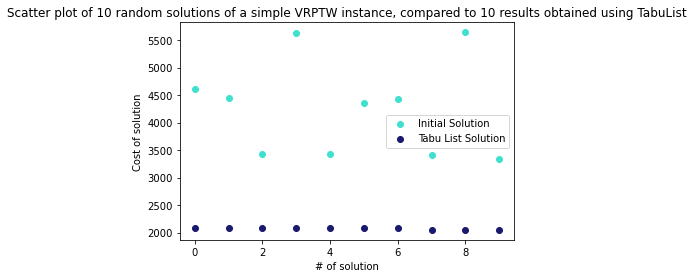

In [17]:
plt.scatter(x=list(range(10)), y=list(map(cost, solutions)), label='Initial Solution',c='turquoise')
plt.scatter(x=list(range(10)), y=list(map(cost, tabu_solutions)), label='Tabu List Solution', c='midnightblue')
plt.legend()
plt.xlabel('# of solution')
plt.ylabel('Cost of solution')
plt.title('Scatter plot of 10 random solutions of a simple VRPTW instance, compared to 10 results obtained using TabuList');

### Recuit Simulé

Importation du code

In [18]:
from recuit_simule import simulated_annealing

Application de la méthode de la liste tabou dans nos 10 solutions.

In [19]:
rs_solutions = []
for i, solution in enumerate(solutions):
    print(f'Working on solution {i+1}/10')
    rs_sol = simulated_annealing(vrptw, solution, T0=30)
    rs_solutions.append(rs_sol)

Working on solution 1/10
Working on solution 2/10
Working on solution 3/10
Working on solution 4/10
Working on solution 5/10
Working on solution 6/10
Working on solution 7/10
Working on solution 8/10
Working on solution 9/10
Working on solution 10/10


On verify q toutes les solutions crées avec la méthode Tabou sont en effet des solutions :

In [20]:
all((solution_checker(vrptw, sol) for sol in rs_solutions))

True

In [21]:
df = pd.DataFrame({'Initial Solution': map(cost, solutions),
                  'Solutions after RS': map(cost, rs_solutions)})
df

,Initial Solution,Solutions after RS
0,4613.582192,2076.568542
1,4438.709948,2076.568542
2,3429.734936,2090.710678
3,5634.200849,2048.284271
4,3429.695754,2048.284271
5,4359.193353,2094.049183
6,4424.368625,2102.462113
7,3409.037743,2084.852814
8,5643.387868,2076.568542
9,3330.948781,2076.568542


Text(0.5, 1.0, 'Scatter plot of 10 random solutions of a simple VRPTW instance, compared to 10 results obtained using TabuList and RS algorithms')

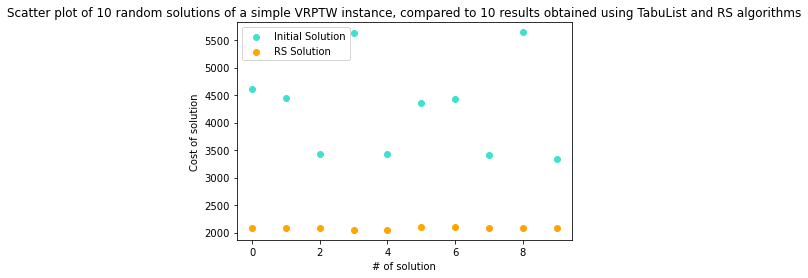

In [22]:
plt.scatter(x=list(range(10)), y=list(map(cost, solutions)), label='Initial Solution', c='turquoise')
plt.scatter(x=list(range(10)), y=list(map(cost, rs_solutions)), label='RS Solution', c='orange')
plt.legend()
plt.xlabel('# of solution')
plt.ylabel('Cost of solution')
plt.title('Scatter plot of 10 random solutions of a simple VRPTW instance, compared to 10 results obtained using TabuList and RS algorithms')

### Algorithme Génetique

import du code

In [5]:
from algorithme_genetique import*

In [6]:
instance =init_vrpga(vrptw)
ga_solutions=[]

In [7]:
for i in range(10):
    for j in range(200):
        instance.evolution()
    print(f"Working on solution {i+1}/10")
    ga_solutions.append(instance.best_solution)

Working on solution 1/10
Working on solution 2/10
Working on solution 3/10
Working on solution 4/10
Working on solution 5/10
Working on solution 6/10
Working on solution 7/10
Working on solution 8/10
Working on solution 9/10
Working on solution 10/10


In [8]:
all((solution_checker(vrptw, sol) for sol in ga_solutions))

True

In [9]:
df = pd.DataFrame({'Initial Solution': map(cost, solutions),
                  'Solutions after GA': map(cost, ga_solutions)})
df

,Initial Solution,Solutions after GA
0,4613.582192,3465.163684
1,4438.709948,3465.163684
2,3429.734936,1498.026105
3,5634.200849,1498.026105
4,3429.695754,1498.026105
5,4359.193353,1498.026105
6,4424.368625,1498.026105
7,3409.037743,1498.026105
8,5643.387868,1498.026105
9,3330.948781,1498.026105


In [24]:
print(ga_solutions[-1],cost(ga_solutions[-1]))

[0, 5, 3, 7, 8, 9, 10, 6, 4, 2, 1, 0] 1498.026104710672


Text(0.5, 1.0, 'Scatter plot of 10 random solutions of a simple VRPTW instance, compared to 10 results obtained using TabuList and GA algorithms')

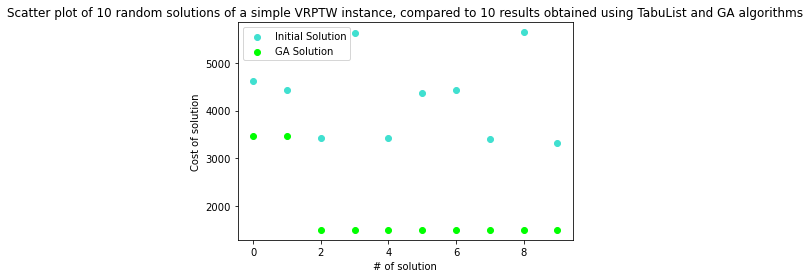

In [10]:
plt.scatter(x=list(range(10)), y=list(map(cost, solutions)), label='Initial Solution', c='turquoise')
plt.scatter(x=list(range(10)), y=list(map(cost, ga_solutions)), label='GA Solution', c='lime')
plt.legend()
plt.xlabel('# of solution')
plt.ylabel('Cost of solution')
plt.title('Scatter plot of 10 random solutions of a simple VRPTW instance, compared to 10 results obtained using TabuList and GA algorithms')

## Résultats

In [25]:
df = pd.DataFrame({'Initial Solution': map(cost, solutions),
                   'Solution after Tabou List': map(cost, tabu_solutions),
                  'Solutions after RS': map(cost, rs_solutions),
                  'Solutions after GA':map(cost, ga_solutions)})
df

,Initial Solution,Solution after Tabou List,Solutions after RS,Solutions after GA
0,4613.582192,2076.568542,2076.568542,3465.163684
1,4438.709948,2076.568542,2076.568542,3465.163684
2,3429.734936,2076.568542,2090.710678,1498.026105
3,5634.200849,2084.852814,2048.284271,1498.026105
4,3429.695754,2076.568542,2048.284271,1498.026105
5,4359.193353,2076.568542,2094.049183,1498.026105
6,4424.368625,2076.568542,2102.462113,1498.026105
7,3409.037743,2048.284271,2084.852814,1498.026105
8,5643.387868,2048.284271,2076.568542,1498.026105
9,3330.948781,2048.284271,2076.568542,1498.026105


Nous pouvons voir comment, grâce aux méthodes heuristiques utilisées, un pool initial de solutions peut être considérablement amélioré.

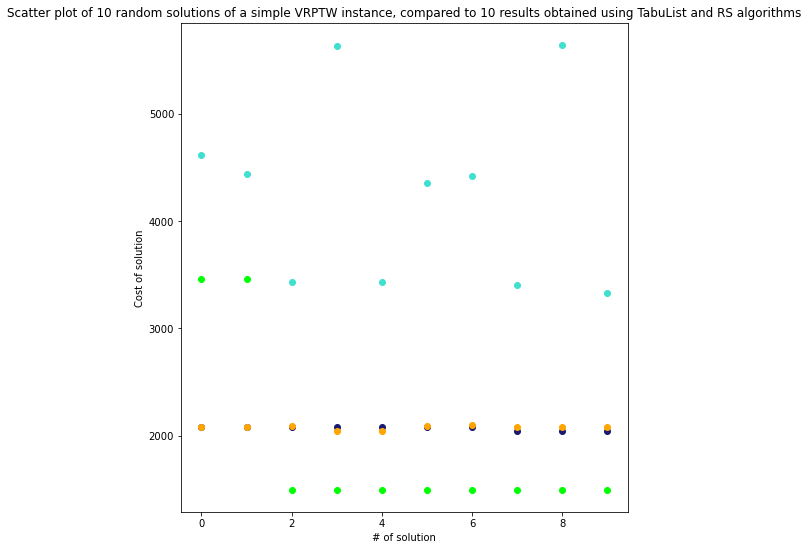

In [26]:
plt.scatter(x=list(range(10)), y=list(map(cost, solutions)), label='Initial Solution', c='turquoise')
plt.scatter(x=list(range(10)), y=list(map(cost, tabu_solutions)), label='Tabu List Solution', c='midnightblue')
plt.scatter(x=list(range(10)), y=list(map(cost, rs_solutions)), label='RS Solution', c='orange')
plt.scatter(x=list(range(10)), y=list(map(cost, ga_solutions)), label='GA Solution', c='lime')
plt.xlabel('# of solution')
plt.ylabel('Cost of solution')
plt.title('Scatter plot of 10 random solutions of a simple VRPTW instance, compared to 10 results obtained using TabuList and RS algorithms');
plt.gcf().set_size_inches(8, 9);